In [12]:
# Basic libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings


In [13]:
df = pd.read_csv('data\student.csv')

In [14]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [15]:
# Seperating dependent and independent features
# Independent features
X = df.drop(columns=['math_score'], axis=1)
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [16]:
# Dependent features
y = df['math_score']
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

In [17]:
# Creating column transformer with 2 types of transformers
numerical_features   = X.select_dtypes(exclude='object').columns
categorical_features = X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose       import ColumnTransformer

numeric_transformer = StandardScaler()
ohe_transformer     = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder', ohe_transformer, categorical_features),
        ('StandardScaler', numeric_transformer, numerical_features)
    ]
)

In [18]:
X = preprocessor.fit_transform(X)

In [19]:
X.shape

(1000, 19)

In [20]:
# Seperate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

In [25]:
def evaluate_model(actual, predicted):
    MAE = mean_absolute_error(actual, predicted)
    MSE = mean_squared_error(actual, predicted)
    RMSE= np.sqrt(MSE)
    r2_square = r2_score(actual, predicted)
    return MAE, RMSE, r2_square
    

In [42]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)
    
    # Predicted values 
    train_prediction = model.predict(X_train)
    test_prediction  = model.predict(X_test)
    
    # Train and Test dataset evalution
    train_mae, train_rmse, train_r2_score = evaluate_model(y_train, train_prediction)
    test_mae,  test_rmse,  test_r2_score  = evaluate_model(y_test,  test_prediction)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print("Model performance for training test: ")
    print("--- Mean Absolute Error: {:.3f}".format(train_mae))
    print("--- Root Mean Squared Error: {:.3f}".format(train_rmse))
    print("--- R2 Score: {:.3f}".format(train_rmse))
    print()
    print("Model performance for test test: ")
    print("--- Mean Absolute Error: {:.3f}".format(test_mae))
    print("--- Root Mean Squared Error: {:.3f}".format(test_rmse))
    print("--- R2 Score: {:.3f}".format(test_r2_score))
    print("---------------------------------------------------")
    print("\n")
    r2_list.append(test_r2_score)

Linear Regression
Model performance for training test: 
--- Mean Absolute Error: 4.267
--- Root Mean Squared Error: 5.324
--- R2 Score: 5.324

Model performance for test test: 
--- Mean Absolute Error: 4.216
--- Root Mean Squared Error: 5.396
--- R2 Score: 0.880
---------------------------------------------------


Lasso
Model performance for training test: 
--- Mean Absolute Error: 5.206
--- Root Mean Squared Error: 6.594
--- R2 Score: 6.594

Model performance for test test: 
--- Mean Absolute Error: 5.158
--- Root Mean Squared Error: 6.520
--- R2 Score: 0.825
---------------------------------------------------


Ridge
Model performance for training test: 
--- Mean Absolute Error: 4.265
--- Root Mean Squared Error: 5.323
--- R2 Score: 5.323

Model performance for test test: 
--- Mean Absolute Error: 4.211
--- Root Mean Squared Error: 5.390
--- R2 Score: 0.881
---------------------------------------------------


K-Neighbors Regressor
Model performance for training test: 
--- Mean Abso

In [45]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2 Score']).sort_values(by=['R2 Score'], ascending=False )

,Model Name,R2 Score
2,Ridge,0.880593
0,Linear Regression,0.880345
7,CatBoosting Regressor,0.851632
5,Random Forest Regressor,0.849479
8,AdaBoost Regressor,0.846517
1,Lasso,0.825320
6,XGBRegressor,0.821589
3,K-Neighbors Regressor,0.783813
4,Decision Tree,0.709643


In [49]:
# Selecting the LinearRegression Model
linear_reg_model = LinearRegression(fit_intercept=True)
linear_reg_model = linear_reg_model.fit(X_train, y_train)
y_pred = linear_reg_model.predict(X_test)
r2score = r2_score(y_test, y_pred)*100
print("Model accuracy: %.2f" %r2score)

Model accuracy: 88.03


Text(0, 0.5, 'Prediction')

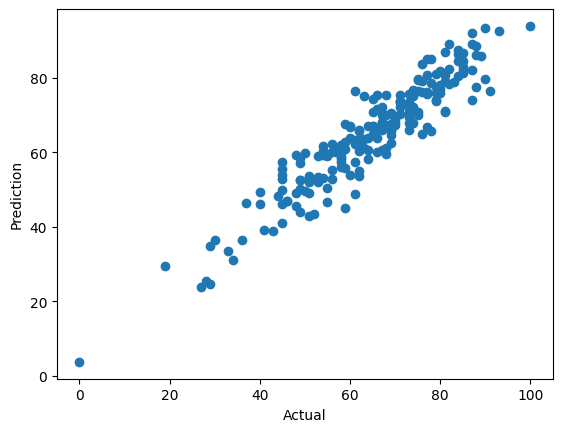

In [50]:
# Plotting y_pre and y_test
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Prediction")

<Axes: xlabel='math_score'>

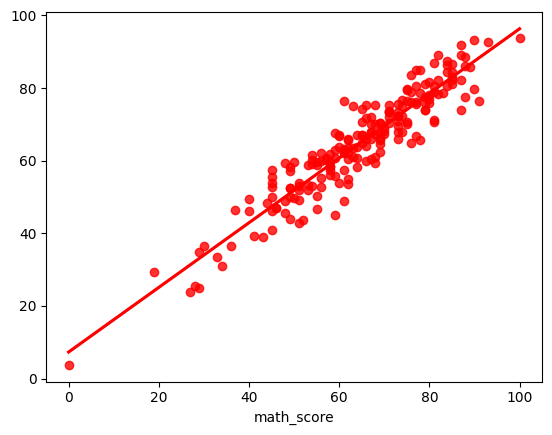

In [51]:
sns.regplot(x=y_test, y=y_pred, ci=None, color="red")

In [52]:
difference_dataframe = pd.DataFrame({'Actual Values': y_test, 'Predicted Values': y_pred, 'Difference': y_test-y_pred})
difference_dataframe

,Actual Values,Predicted Values,Difference
521,91,76.507812,14.492188
737,53,58.953125,-5.953125
740,80,76.960938,3.039062
660,74,76.757812,-2.757812
411,84,87.539062,-3.539062
...,...,...,...
408,52,43.546875,8.453125
332,62,62.031250,-0.031250
208,74,67.976562,6.023438
613,65,67.132812,-2.132812
